Epoch 0, loss: 0.2510758936405182
Test_acc: 0.3
--------------------------
Epoch 1, loss: 0.20274785161018372
Test_acc: 0.6333333333333333
--------------------------
Epoch 2, loss: 0.19009871780872345
Test_acc: 0.6333333333333333
--------------------------
Epoch 3, loss: 0.1788853108882904
Test_acc: 0.6333333333333333
--------------------------
Epoch 4, loss: 0.16892117261886597
Test_acc: 0.6333333333333333
--------------------------
Epoch 5, loss: 0.1604090929031372
Test_acc: 0.6333333333333333
--------------------------
Epoch 6, loss: 0.1532016396522522
Test_acc: 0.6333333333333333
--------------------------
Epoch 7, loss: 0.1470983773469925
Test_acc: 0.6333333333333333
--------------------------
Epoch 8, loss: 0.14190389215946198
Test_acc: 0.6333333333333333
--------------------------
Epoch 9, loss: 0.13744837045669556
Test_acc: 0.6333333333333333
--------------------------
Epoch 10, loss: 0.13359171152114868
Test_acc: 0.6333333333333333
--------------------------
Epoch 11, loss: 0.

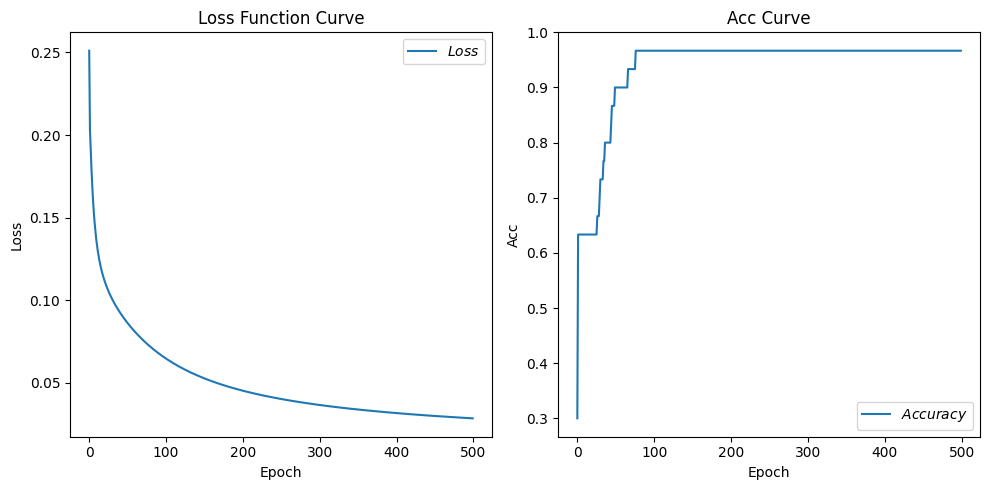

In [8]:
from sklearn import datasets
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

# 数据准备
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 确保数据类型为 float32
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.int32)

np.random.seed(1160)
np.random.shuffle(x_data)
np.random.seed(1160)
np.random.shuffle(y_data)

x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 模型参数 - 确保使用 float32
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1, dtype=tf.float32))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1, dtype=tf.float32))

# 训练参数
lr = 0.1
train_loss_results = []
test_acc = []
epoch = 500

# 训练循环
for epoch in range(epoch):
    loss_all = 0
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            # 确保输入数据类型为 float32
            x_train = tf.cast(x_train, tf.float32)
            y = tf.matmul(x_train, w1) + b1
            y = tf.nn.softmax(y)
            y_ = tf.one_hot(y_train, depth=3)
            loss = tf.reduce_mean(tf.square(y_ - y))
            loss_all += loss

        grads = tape.gradient(loss, [w1, b1])
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
    
    avg_loss = loss_all / len(train_db)
    train_loss_results.append(avg_loss)
    print("Epoch {}, loss: {}".format(epoch, avg_loss))
    
    # 测试
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 确保测试数据也是 float32
        x_test = tf.cast(x_test, tf.float32)
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)
        pred = tf.cast(pred, dtype=y_test.dtype)
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        total_correct += int(correct)
        total_number += x_test.shape[0]
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc: {}".format(acc))
    print("--------------------------")

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Loss Function Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_loss_results, label="$Loss$")
plt.legend()

# 绘制准确率曲线
plt.subplot(1, 2, 2)
plt.title('Acc Curve')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.plot(test_acc, label="$Accuracy$")
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
import tensorflow as tf
from sklearn import datasets
import numpy as np

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_train)
np.random.shuffle(y_train)
tf.random.set_seed(116)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2, validation_freq=20)

model.summary()


Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 2.0627 - sparse_categorical_accuracy: 0.3833
Epoch 2/500
4/4 [==============================] - 0s 842us/step - loss: 1.4013 - sparse_categorical_accuracy: 0.3917
Epoch 3/500
4/4 [==============================] - 0s 727us/step - loss: 1.1723 - sparse_categorical_accuracy: 0.3250
Epoch 4/500
4/4 [==============================] - 0s 728us/step - loss: 1.1963 - sparse_categorical_accuracy: 0.3333
Epoch 5/500
4/4 [==============================] - 0s 709us/step - loss: 1.4124 - sparse_categorical_accuracy: 0.3500
Epoch 6/500
4/4 [==============================] - 0s 780us/step - loss: 1.1425 - sparse_categorical_accuracy: 0.3167
Epoch 7/500
4/4 [==============================] - 0s 754us/step - loss: 1.1235 - sparse_categorical_accuracy: 0.4083
Epoch 8/500
4/4 [==============================] - 0s 738us/step - loss: 1.4419 - sparse_categorical_accuracy: 0.2917
Epoch 9/500
4/4 [==============================] - 0s 701u

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from sklearn import datasets
import numpy as np

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)
tf.random.set_seed(116)

class IrisModel(Model):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.d1 = Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())
    
    def call(self, x):
        y = self.d1(x)
        return y

model = IrisModel()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2, validation_freq=20)

model.summary()


Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 1.9139 - sparse_categorical_accuracy: 0.4333
Epoch 2/500
4/4 [==============================] - 0s 983us/step - loss: 0.9215 - sparse_categorical_accuracy: 0.5833
Epoch 3/500
4/4 [==============================] - 0s 787us/step - loss: 0.9331 - sparse_categorical_accuracy: 0.6833
Epoch 4/500
4/4 [==============================] - 0s 777us/step - loss: 0.7676 - sparse_categorical_accuracy: 0.6750
Epoch 5/500
4/4 [==============================] - 0s 820us/step - loss: 0.9316 - sparse_categorical_accuracy: 0.6417
Epoch 6/500
4/4 [==============================] - 0s 773us/step - loss: 0.7277 - sparse_categorical_accuracy: 0.7417
Epoch 7/500
4/4 [==============================] - 0s 752us/step - loss: 0.6048 - sparse_categorical_accuracy: 0.7417
Epoch 8/500
4/4 [==============================] - 0s 754us/step - loss: 0.5841 - sparse_categorical_accuracy: 0.8333
Epoch 9/500
4/4 [==============================] - 0s 754u

In [12]:
import tensorflow as tf

print("TensorFlow 版本:", tf.__version__)
print("可用的GPU列表：", tf.config.list_physical_devices('GPU'))

TensorFlow 版本: 2.15.1
可用的GPU列表： [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)

model.summary()

import tensorflow as tf


 2285568/11490434 [====>.........................] - ETA: 2:55

KeyboardInterrupt: 

In [ ]:
def generateds(path, txt):
    f = open(txt, 'r')
    contents = f.readlines()
    f.close()
    x, y_ = [], []
    for content in contents:
        value = content.split()

In [4]:
import os
# print current directory
print(os.getcwd())

/home/gl/projects/Borzoi/paddy


In [6]:
data_stats_file = f"./statistics.json"
with open(data_stats_file) as data_stats_open:
        data_stats = json.load(data_stats_open)

FileNotFoundError: [Errno 2] No such file or directory: './statistics.json'

In [14]:
# create a random int 2 * 2 * 3 matrix
# help me write a function to create a random int 2 * 2 * 3 matrix
import numpy as np
import tensorflow as tf
def create_random_matrix():
    seed = 1234 
    np.random.seed(seed)
    tf.random.set_seed(seed)
    return np.random.randint(0, 10, (2, 2, 3))

matrix = create_random_matrix()
print(matrix)
# use tf.reduce_sum to sum the matrix
matrix_sum = tf.reduce_sum(matrix, axis=[0,1])
matrix_sum





[[[3 6 5]
  [4 8 9]]

 [[1 7 9]
  [6 8 0]]]


<tf.Tensor: shape=(3,), dtype=int64, numpy=array([14, 29, 23])>